Perceptron Algorithm

In [1]:
## importing the libraries; numpy(scientific computing) and matplotlib(for plotting)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
np.random.seed(0) ## Makes random generation predictable.

In [3]:
# here normal --> Normal Gaussian distribution. Loc is basically the mean so the whisker length is centered around 5. Scale 1 means that
# all the values will be between 4 and 6, size is basically the size of the array. 
# Eg: for flappiness: array([8.21, 7.95, 9.10, 7.32, 8.75, 8.12, 6.89, 7.58, 8.66, 7.44])

dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappines_index = np.random.normal(loc=8, scale=1, size=10)

In [4]:

cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappines_index = np.random.normal(loc=5, scale=1, size=10)

In [50]:
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappines_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappines_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(cats_data)), np.ones(len(dogs_data))))
labels[labels == 0] = -1

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [52]:
y_train

array([-1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,
        1.,  1., -1.])

/var/folders/4d/s4myz09n61x3tlr4qf0r85qw0000gn/T/ipykernel_24623/2512929324.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[:, 0], X_test[:, 1], label = 'Test samples', cmap='bwr')


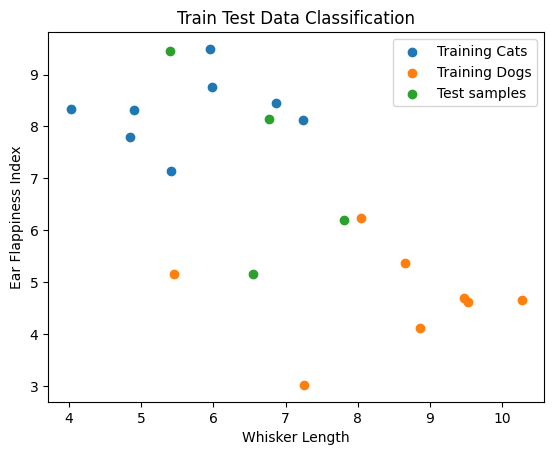

In [54]:
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], label = 'Training Cats')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label = 'Training Dogs')
plt.scatter(X_test[:, 0], X_test[:, 1], label = 'Test samples', cmap='bwr')
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Train Test Data Classification")
plt.legend()
plt.show()

In [9]:
# Implementing perceptron algo

# 1) Take both theta and theta0 = 0
# 2) Iterate over each data sample and adjust the weights if there is a false prediction.
# 3) if y*(wTx) <= 0 ---> Wrongly classified so adjust weights
# 4) theta = theta + y*x, theta0 = theta0 + y
# 5) Return the value of theta and theta0

In [80]:
def perceptron_classification(x, y, theta, theta0):
    pred = np.dot(x, theta) + theta0
    if(y*pred <= 0):
        return False
    
    return True


In [102]:
def plot_decision_boundary(theta, theta0, iteration):
    x_vals_train = np.linspace(2,10,100)
    # ax+by+c = 0 ---> y = (-c-ax)/b
    y_vals_train = (-theta0/theta[1]) - (theta[0]/theta[1]) * x_vals_train

    if(theta[1] == 0):
        return

    plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], label = 'Training Cats', marker='x')
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label = 'Training Dogs', marker='+')
    plt.scatter(X_test[:, 0], X_test[:, 1], label = 'Test samples', cmap='bwr')
    plt.plot(x_vals_train, y_vals_train, color="red", linestyle = '--', label = f'Iteration {iteration}')
    plt.xlabel("Whisker Length")
    plt.ylabel("Ear Flappiness Index")
    plt.title(f'Decision Boundary at iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [110]:
def perceptron(data, output, d, T): # here d is the number of dimensions which is 2 in this case

    theta0 = 0    
    theta = np.zeros(d)  

    for steps in range(T):
        for i in range(len(data)):
            if(not perceptron_classification(data[i], output[i], theta, theta0)):
                theta += output[i]*data[i]
                theta0 += output[i]

        plot_decision_boundary(theta, theta0, steps+1)

    return theta0, theta

/var/folders/4d/s4myz09n61x3tlr4qf0r85qw0000gn/T/ipykernel_24623/1556616071.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[:, 0], X_test[:, 1], label = 'Test samples', cmap='bwr')


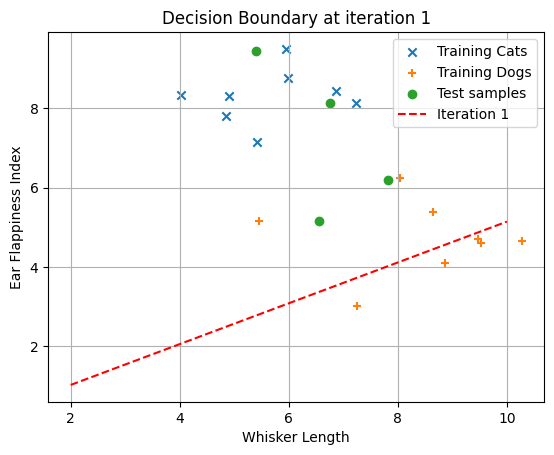

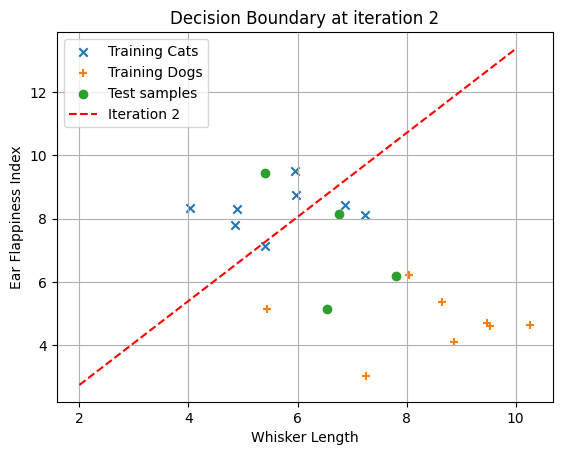

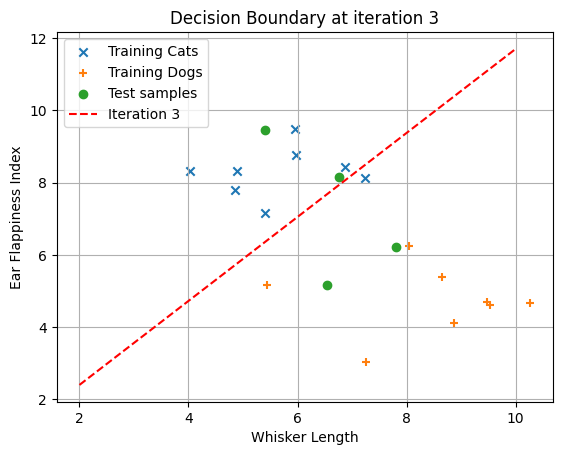

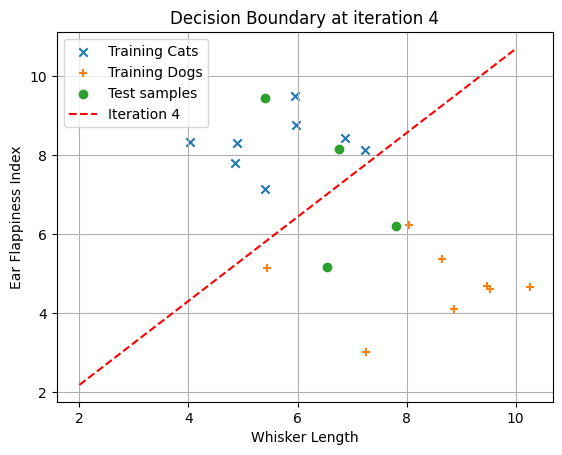

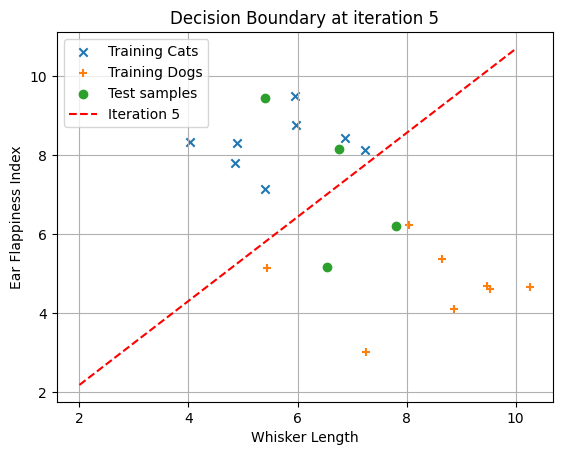

In [111]:
theta0, theta = perceptron(X_train, y_train, 2, 5)

In [98]:
theta, theta0

(array([ 19.05617337, -17.92035445]), np.float64(1.0))